In [2]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load ADHD dataset and handle missing values
missing_value_formats = ["pending"]
adhd_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/content/Dataset_ADHD200_phenotypic.csv', na_values=missing_value_formats)

In [4]:
adhd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Disclaimer       25 non-null     object 
 1   ID               197 non-null    int64  
 2   Site             197 non-null    int64  
 3   Gender           197 non-null    int64  
 4   Age              197 non-null    float64
 5   Handedness       195 non-null    object 
 6   DX               171 non-null    float64
 7   Secondary Dx     11 non-null     object 
 8   ADHD Measure     51 non-null     float64
 9   ADHD Index       88 non-null     float64
 10  Inattentive      88 non-null     float64
 11  Hyper/Impulsive  88 non-null     float64
 12  Med Status       60 non-null     float64
 13  IQ Measure       171 non-null    float64
 14  Verbal IQ        137 non-null    float64
 15  Performance IQ   137 non-null    float64
 16  Full2 IQ         75 non-null     float64
 17  Full4 IQ        

In [5]:
adhd_data.head()

,Disclaimer,ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,...,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
0,NaN,1038415,1,1,14.92,1,3.0,ODD,1.0,52.0,...,109.0,103.0,-999.0,107.0,1,NaN,NaN,NaN,1,NaN
1,NaN,1201251,1,1,12.33,1,3.0,NaN,1.0,49.0,...,115.0,103.0,-999.0,110.0,1,NaN,NaN,NaN,1,NaN
2,NaN,1245758,1,0,8.58,1,0.0,NaN,1.0,35.0,...,121.0,88.0,-999.0,106.0,1,NaN,NaN,NaN,1,NaN
3,NaN,1253411,1,1,8.08,1,0.0,NaN,1.0,35.0,...,119.0,106.0,-999.0,114.0,1,NaN,NaN,NaN,1,NaN
4,NaN,1419103,1,0,9.92,1,0.0,NaN,1.0,41.0,...,124.0,76.0,-999.0,102.0,1,NaN,NaN,NaN,1,NaN


In [6]:
adhd_data.isnull().sum()

,0
Disclaimer,172
ID,0
Site,0
Gender,0
Age,0
Handedness,2
DX,26
Secondary Dx,186
ADHD Measure,146
ADHD Index,109


In [8]:
adhd_data.describe()

,ID,Site,Gender,Age,DX,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,Med Status,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,QC_Rest_1,QC_Anatomical_1
count,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,197.0,197.000000
mean,8.463027e+05,3.593909,0.583756,12.214670,0.796954,1.0,51.197970,40.134518,35.906091,1.040609,2.715736,113.101523,108.126904,-401.77665,112.080203,1.0,0.964467
std,1.734740e+06,2.019690,0.494191,3.769128,0.989429,0.0,76.752178,78.431554,78.105420,0.197886,1.040215,12.245359,12.797845,538.06565,12.331272,0.0,0.185594
min,2.000100e+04,1.000000,0.000000,7.260000,0.000000,1.0,-999.000000,-999.000000,-999.000000,1.000000,1.000000,80.000000,67.000000,-999.00000,77.000000,1.0,0.000000
25%,2.104300e+04,1.000000,0.000000,9.320000,0.000000,1.0,49.000000,27.000000,23.000000,1.000000,2.000000,104.000000,102.000000,-999.00000,106.000000,1.0,1.000000
50%,2.600500e+04,4.000000,1.000000,11.280000,1.000000,1.0,50.000000,27.000000,23.000000,1.000000,3.000000,112.000000,112.000000,75.00000,114.000000,1.0,1.000000
75%,1.201251e+06,5.000000,1.000000,14.530000,1.000000,1.0,75.000000,77.000000,72.000000,1.000000,3.000000,121.000000,117.000000,75.00000,119.000000,1.0,1.000000
max,9.744150e+06,7.000000,1.000000,26.310000,3.000000,1.0,90.000000,90.000000,90.000000,2.000000,5.000000,146.000000,143.000000,128.00000,144.000000,1.0,1.000000


In [7]:
# clean the data
adhd_data = adhd_data.drop(adhd_data.columns[[0, 5, 7, 19, 20, 21, 23]], axis=1)
adhd_data.ffill(inplace=True)  # Forward fill for missing data
print(adhd_data[adhd_data.duplicated()])

Empty DataFrame
Columns: [ID, Site, Gender, Age, DX, ADHD Measure, ADHD Index, Inattentive, Hyper/Impulsive, Med Status, IQ Measure, Verbal IQ, Performance IQ, Full2 IQ, Full4 IQ, QC_Rest_1, QC_Anatomical_1]
Index: []


<ipython-input-57-78f910c6308a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=adhd_data, palette='Set2')


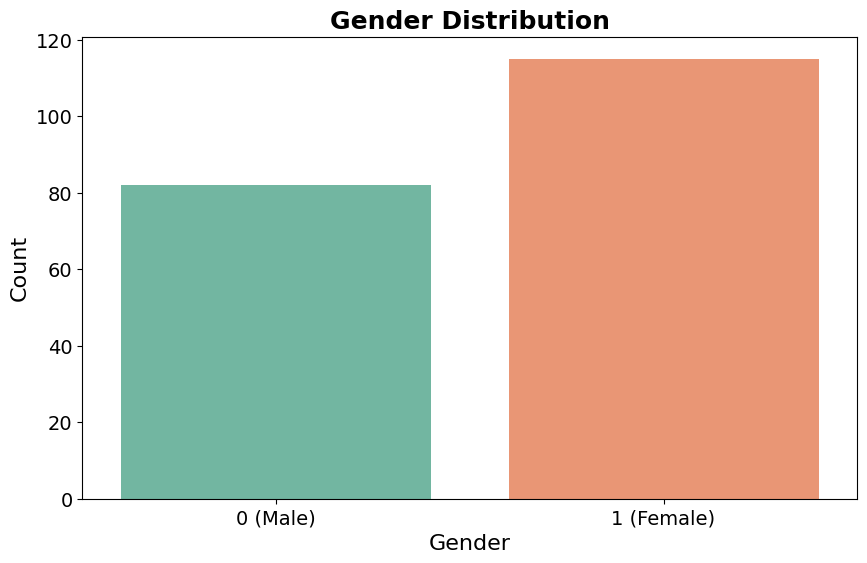

In [ ]:
# Replace 'Male' with 0 and 'Female' with 1 in the 'Gender' column
adhd_data['Gender'] = adhd_data['Gender'].replace({'Male': 0, 'Female': 1})

# Modern countplot for 'Gender' with improved readability
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=adhd_data, palette='Set2')
plt.title('Gender Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['0 (Male)', '1 (Female)'], rotation=0, fontsize=14)  # Custom labels
plt.yticks(fontsize=14)
plt.show()

<ipython-input-59-39cdbcc1dd98>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DX', data=adhd_data, palette='Set2')


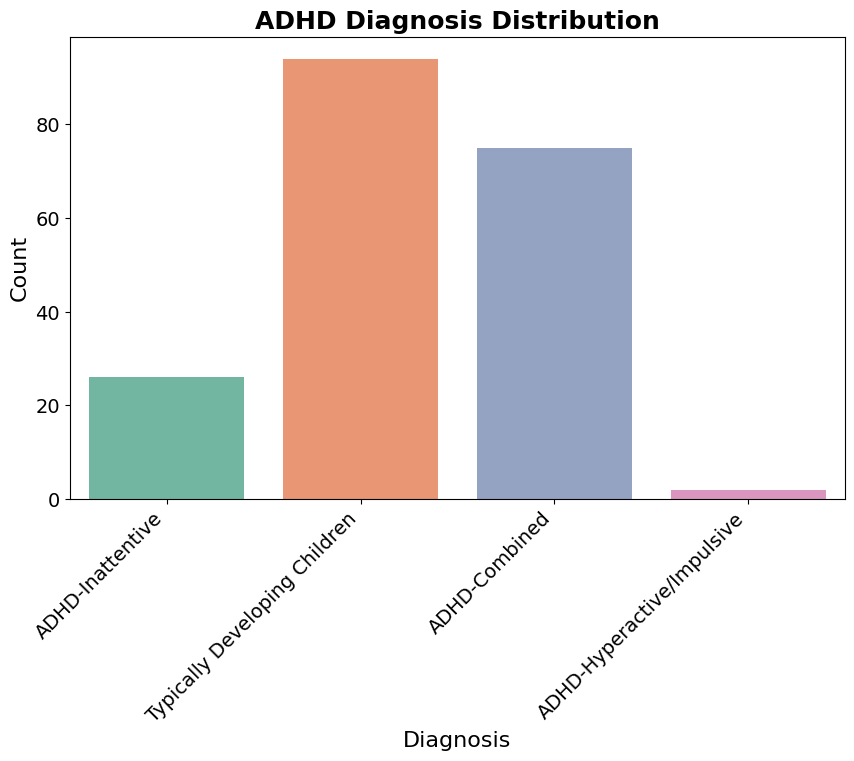

In [ ]:
# Assuming the 'DX' column contains the values 0, 1, 2, 3, we will map them to descriptive names
diagnosis_labels = {0: 'Typically Developing Children',
                    1: 'ADHD-Combined',
                    2: 'ADHD-Hyperactive/Impulsive',
                    3: 'ADHD-Inattentive'}

# Replace numerical diagnosis codes with descriptive labels
adhd_data['DX'] = adhd_data['DX'].map(diagnosis_labels)

# Modern countplot for 'DX' (Diagnosis) with improved readability
plt.figure(figsize=(10, 6))
sns.countplot(x='DX', data=adhd_data, palette='Set2')
plt.title('ADHD Diagnosis Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()


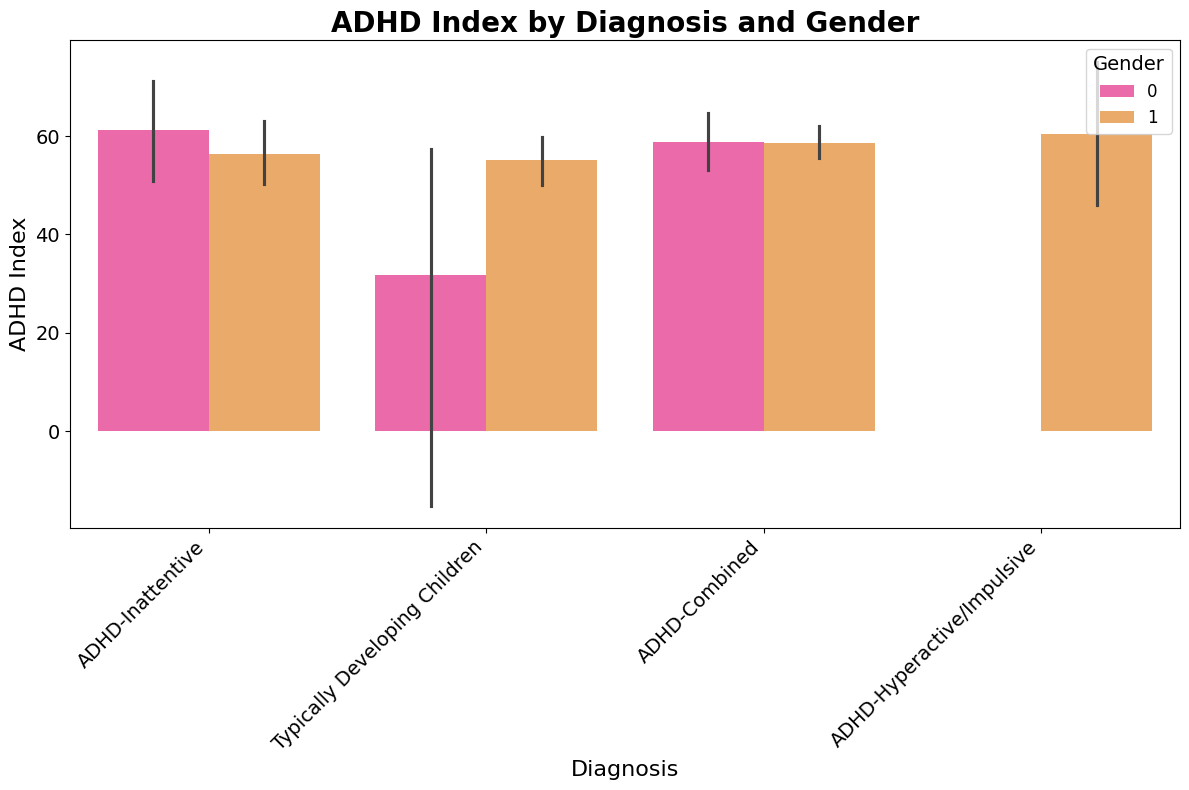

In [ ]:
# Improved barplot for 'DX' vs 'ADHD Index' with 'Gender' as hue
plt.figure(figsize=(12, 8))
sns.barplot(x='DX', y='ADHD Index', hue='Gender', data=adhd_data, palette='spring')

# Add title and labels with improved font sizes
plt.title('ADHD Index by Diagnosis and Gender', fontsize=20, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=16)
plt.ylabel('ADHD Index', fontsize=16)

# Improve x-ticks and y-ticks readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add legend title and improve its appearance
plt.legend(title='Gender', title_fontsize='14', fontsize='12', loc='upper right')

# Display the plot
plt.tight_layout()  # Ensures no clipping of axis labels
plt.show()


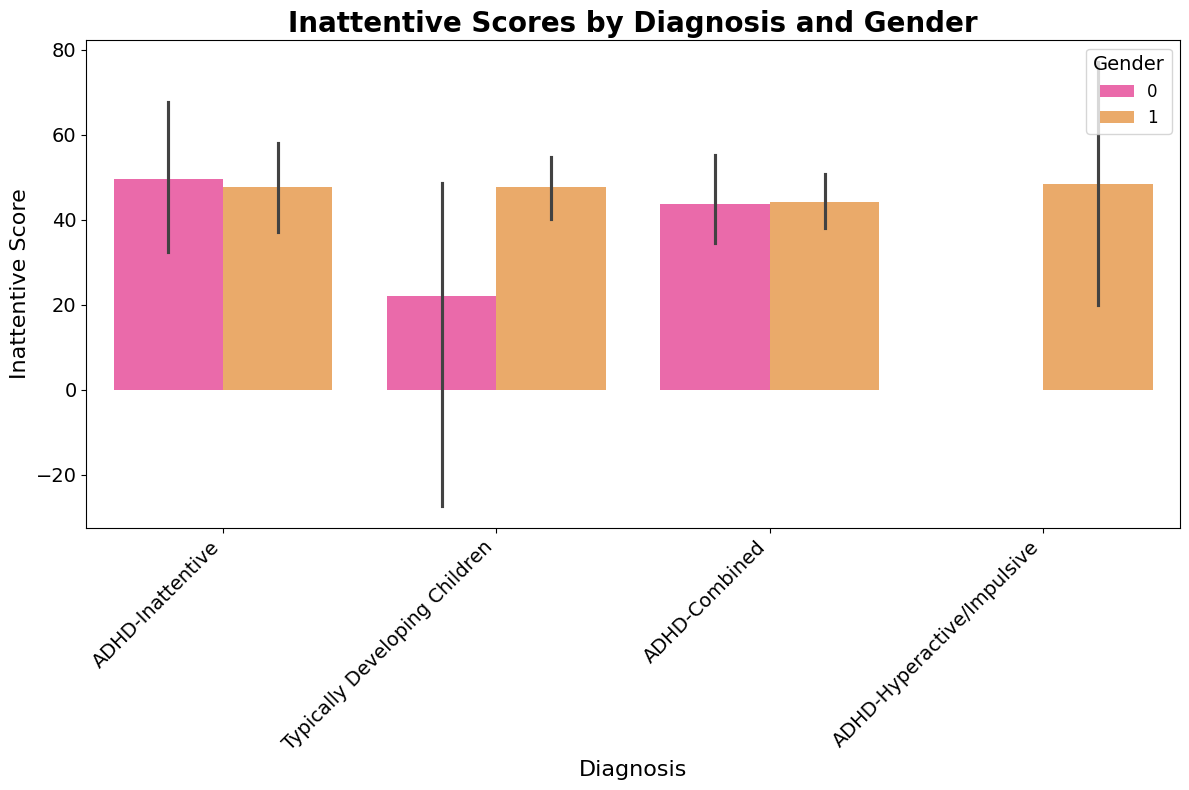

In [ ]:
# Improved barplot for 'DX' vs 'Inattentive' with 'Gender' as hue
plt.figure(figsize=(12, 8))
sns.barplot(x='DX', y='Inattentive', hue='Gender', data=adhd_data, palette='spring')

# Add title and labels with improved font sizes
plt.title('Inattentive Scores by Diagnosis and Gender', fontsize=20, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=16)
plt.ylabel('Inattentive Score', fontsize=16)

# Improve x-ticks and y-ticks readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Add legend title and improve its appearance
plt.legend(title='Gender', title_fontsize='14', fontsize='12', loc='upper right')

# Display the plot
plt.tight_layout()  # Ensures no clipping of axis labels
plt.show()

<ipython-input-65-8ae9c56930d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='IQ Measure', data=adhd_data, palette='Set3')


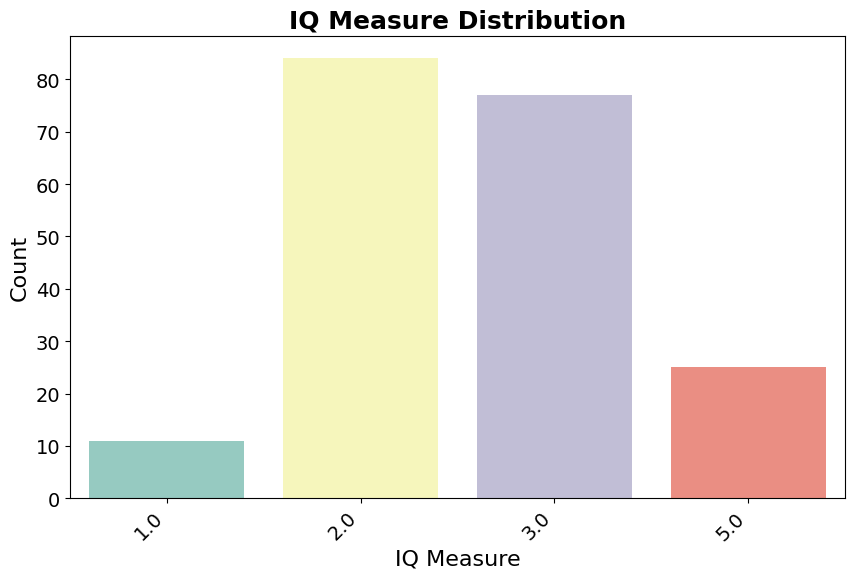

In [ ]:
# Modern countplot for 'IQ Measure' with improved readability
plt.figure(figsize=(10, 6))
sns.countplot(x='IQ Measure', data=adhd_data, palette='Set3')
plt.title('IQ Measure Distribution', fontsize=18, fontweight='bold')
plt.xlabel('IQ Measure', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

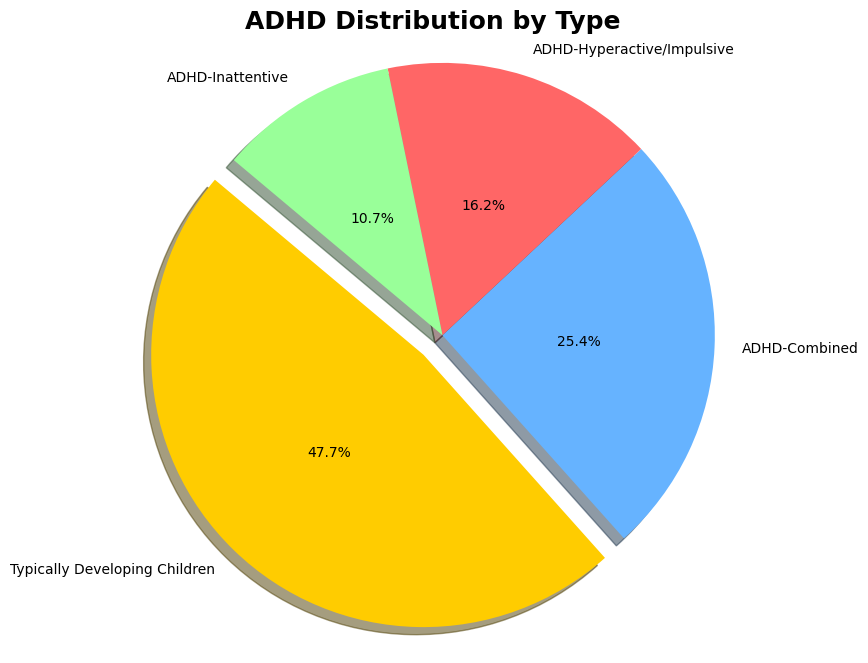

In [ ]:
# Modern Pie chart for ADHD distribution with better labels
types = ['Typically Developing Children', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive']
sizes = [94, 50, 32, 21]
colors = ['#ffcc00', '#66b3ff', '#ff6666', '#99ff99']  # Modern color palette
explode = (0.1, 0, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=types, colors=colors, autopct='%1.1f%%', explode=explode, pctdistance=0.5, shadow=True, startangle=140)
plt.title('ADHD Distribution by Type', fontsize=18, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Prepare the data for model training
X = adhd_data.drop(columns=['DX', 'ID'], axis=1)
Y = adhd_data['DX']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
print(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


     Site  Gender    Age  ADHD Measure  ADHD Index  Inattentive  \
5       1       1   9.75           1.0        36.0         20.0   
65      2       0  13.67           1.0        50.0         27.0   
137     5       1  10.73           1.0        49.0         56.0   
97      4       0  20.34           1.0        50.0         27.0   
169     6       0   9.50           1.0        75.0         77.0   
..    ...     ...    ...           ...         ...          ...   
106     4       0  21.53           1.0        50.0         27.0   
14      1       0  13.75           1.0        44.0         23.0   
92      4       1  16.92           1.0        50.0         27.0   
179     6       0   8.50           1.0        75.0         77.0   
102     4       0  20.02           1.0        50.0         27.0   

     Hyper/Impulsive  Med Status  IQ Measure  Verbal IQ  Performance IQ  \
5               16.0         1.0         3.0      141.0           138.0   
65              23.0         1.0         3.0 

In [ ]:
# Define models for comparison
models = {
    'SVM': svm.SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Neural Network': tf.keras.Sequential([
        layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(512, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(4, activation='sigmoid')

    ])
}

# Compile and train the Neural Network model
models['Neural Network'].compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy of SVM: 0.6250


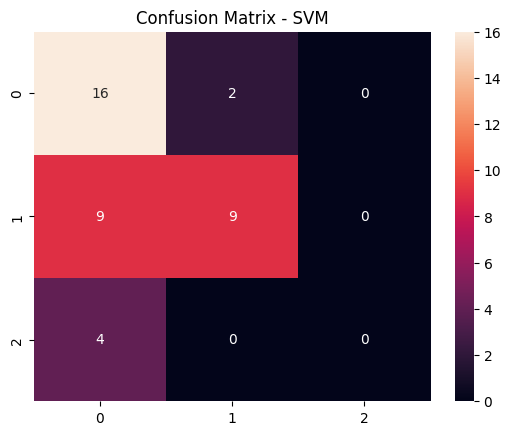

Accuracy of Decision Tree: 0.6750


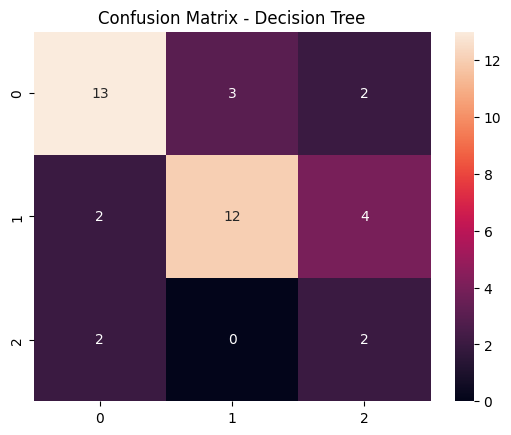

Accuracy of Logistic Regression: 0.6750


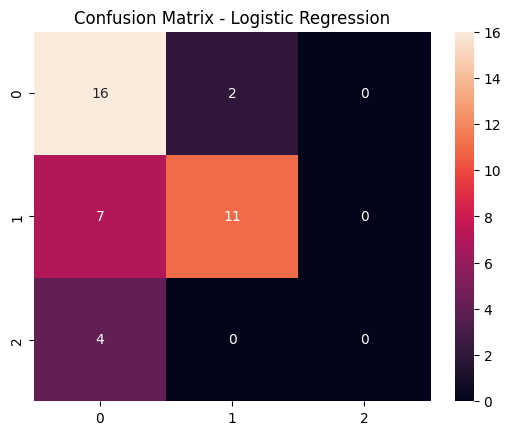

Accuracy of KNN: 0.6750


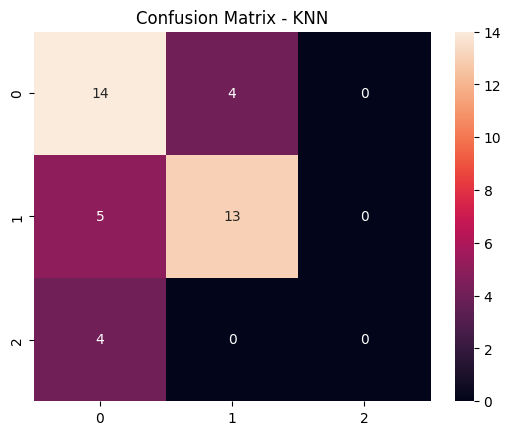

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Updated Random Forest Accuracy after tuning: 0.8500
Accuracy of Random Forest: 0.8500


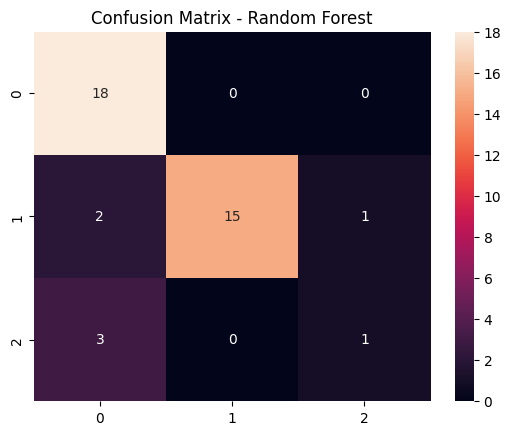

Accuracy of Gradient Boosting: 0.7750


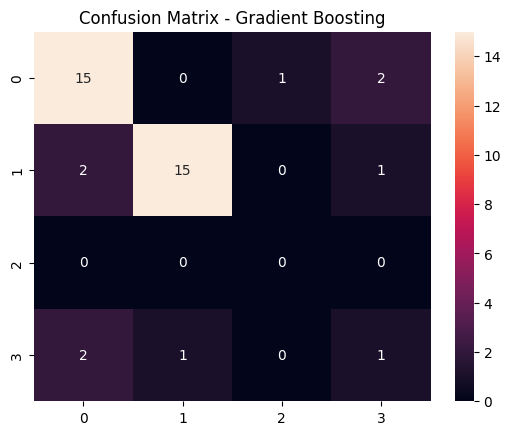

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Updated XGBoost Accuracy after tuning: 0.8750
Accuracy of XGBoost: 0.8750


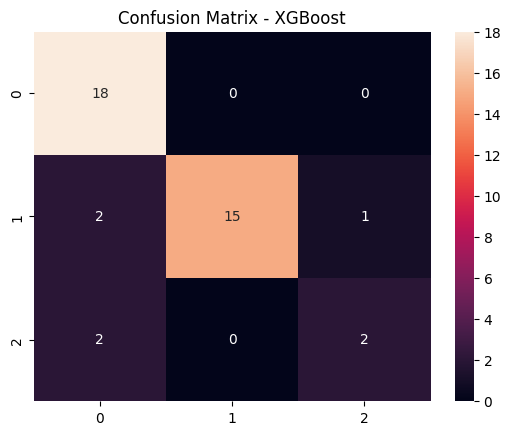

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8479 - loss: 0.9546
Accuracy of Neural Network: 0.8500

Model Performance Comparison:
SVM: 0.6250
Decision Tree: 0.6750
Logistic Regression: 0.6750
KNN: 0.6750
Random Forest: 0.8500
Gradient Boosting: 0.7750
XGBoost: 0.8750
Neural Network: 0.8500

Best model based on accuracy: XGBoost with accuracy 0.8750


In [ ]:
# Store model performance
results = {}

# Train and evaluate each model
for name, model in models.items():
    if name == 'Neural Network':
        history = model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        _, accuracy = model.evaluate(X_test, Y_test)
    else:
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

    ############### Improvements for Accuracy Begin ###############
    if name != 'Neural Network' and name != 'SVM':  # Example hyperparameter tuning for Random Forest & XGBoost
        if name == 'Random Forest':
            param_grid = {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, None],
                'min_samples_split': [2, 5],
                'min_samples_leaf': [1, 2]
            }
            grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
            grid_search.fit(X_train, Y_train)
            best_model = grid_search.best_estimator_  # This will store the actual model object
            accuracy = accuracy_score(Y_test, best_model.predict(X_test))
            print(f"Updated Random Forest Accuracy after tuning: {accuracy:.4f}")

        if name == 'XGBoost':
            param_grid_xgb = {
                'n_estimators': [100, 150, 200],
                'max_depth': [6, 10, 12],
                'learning_rate': [0.01, 0.1, 0.2]
            }
            grid_search_xgb = GridSearchCV(estimator=model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
            grid_search_xgb.fit(X_train, Y_train)
            best_model_xgb = grid_search_xgb.best_estimator_  # This will store the actual model object
            accuracy = accuracy_score(Y_test, best_model_xgb.predict(X_test))
            print(f"Updated XGBoost Accuracy after tuning: {accuracy:.4f}")

    # Neural Network Architecture Improvement - Add Dropout
    if name == 'Neural Network':
        model.add(layers.Dropout(0.1))  # Adding Dropout to prevent overfitting

    ############### Improvements for Accuracy End ###############

    # Store accuracy
    results[name] = accuracy
    print(f"Accuracy of {name}: {accuracy:.4f}")

    # Display confusion matrix for each model
    if name != 'Neural Network':
        cm = confusion_matrix(Y_test, Y_pred)
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f'Confusion Matrix - {name}')
        plt.show()

# Display results of all models
print("\nModel Performance Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

# Insights and best model selection
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]  # Get the actual best model object
print(f"\nBest model based on accuracy: {best_model_name} with accuracy {results[best_model_name]:.4f}")


In [ ]:

# Function to get user input
def get_user_input(features):
    while True:
        try:
            input_values = input(f"Enter values for {', '.join(features)} separated by commas (use 0 for default): ")
            user_input = [float(value.strip()) if float(value.strip()) != 0 else 0 for value in input_values.split(',')]
            if len(user_input) != len(features):
                print(f"Please enter exactly {len(features)} values.")
                continue
            return np.array(user_input).reshape(1, -1)
        except ValueError:
            print("Invalid input! Please enter numerical values.")

# Feature names for input
feature_names = list(X.columns)

# Get custom input from the user
custom_input = get_user_input(feature_names)

# Standardize and apply PCA to custom input
custom_input = scaler.transform(custom_input)
custom_input = pca.transform(custom_input)

# Predict using the best model
final_prediction = best_model.predict(custom_input)  # Use the actual model object for prediction

# If Neural Network, ensure it's the right format (softmax output)
if best_model_name == 'Neural Network':
    final_prediction = np.argmax(final_prediction, axis=1)

# Interpret prediction
adhd_classes = ['Typically Developing Children', 'ADHD-Combined', 'ADHD-Hyperactive/Impulsive', 'ADHD-Inattentive']
predicted_class = int(final_prediction[0])

if predicted_class < len(adhd_classes):
    print(f"The Person has: {adhd_classes[predicted_class]}")
else:
    print("Error: Invalid prediction.")


Enter values for Site, Gender, Age, ADHD Measure, ADHD Index, Inattentive, Hyper/Impulsive, Med Status, IQ Measure, Verbal IQ, Performance IQ, Full2 IQ, Full4 IQ, QC_Rest_1, QC_Anatomical_1 separated by commas (use 0 for default): 1,  1, 14, 1, 52, 34, 18, 1, 3, 109, 103, -999, 107, 1, 1 
The Person has: ADHD-Inattentive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
